<a href="https://colab.research.google.com/github/sharinair14/Python-programs/blob/master/Bank_Marketing_dataset_using_Logistics_regression_without_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [45]:
banking=pd.read_csv('/content/banking.csv')

In [3]:
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1.0


In [4]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26535 entries, 0 to 26534
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26535 non-null  int64  
 1   job             26535 non-null  object 
 2   marital         26535 non-null  object 
 3   education       26535 non-null  object 
 4   default         26535 non-null  object 
 5   housing         26535 non-null  object 
 6   loan            26535 non-null  object 
 7   contact         26535 non-null  object 
 8   month           26535 non-null  object 
 9   day_of_week     26535 non-null  object 
 10  duration        26535 non-null  int64  
 11  campaign        26535 non-null  int64  
 12  pdays           26535 non-null  int64  
 13  previous        26535 non-null  int64  
 14  poutcome        26535 non-null  object 
 15  emp_var_rate    26534 non-null  float64
 16  cons_price_idx  26534 non-null  float64
 17  cons_conf_idx   26534 non-null 

In [5]:
banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [6]:
banking.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      1
cons_price_idx    1
cons_conf_idx     1
euribor3m         1
nr_employed       1
y                 1
dtype: int64

In [10]:
banking.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,26535.000000,26535.000000,26535.000000,26535.000000,26535.000000,26534.000000,26534.000000,26534.000000,26534.000000,26534.000000,26534.000000
mean,40.001432,258.276277,2.566196,962.255851,0.174562,0.082803,93.579151,-40.494113,3.621250,5166.902680,0.115135
std,10.395307,261.949700,2.787812,187.441203,0.497201,1.570999,0.580151,4.625197,1.735472,72.539633,0.319191
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [11]:
banking.groupby('education')['y'].value_counts()

education            y  
Basic                0.0    7386
                     1.0     705
High school          0.0    5395
                     1.0     685
Illiterate           0.0      10
                     1.0       2
Professional course  0.0    2984
                     1.0     403
University degree    0.0    6755
                     1.0    1100
Unknown              0.0     949
                     1.0     160
Name: y, dtype: int64

In [46]:
banking.education[banking.education == 'basic.4y'] = 'Basic'
banking.education[banking.education == 'basic.6y'] = 'Basic'
banking.education[banking.education == 'basic.9y'] = 'Basic'
banking.education[banking.education == 'high.school'] = 'High school'
banking.education[banking.education == 'illiterate'] = 'Illiterate'
banking.education[banking.education == 'professional.course'] = 'Professional course'
banking.education[banking.education == 'university.degree'] = 'University degree'
banking.education[banking.education == 'unknown'] = 'Unknown'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [13]:
banking.groupby('education')['y'].value_counts()

education            y  
Basic                0.0    7386
                     1.0     705
High school          0.0    5395
                     1.0     685
Illiterate           0.0      10
                     1.0       2
Professional course  0.0    2984
                     1.0     403
University degree    0.0    6755
                     1.0    1100
Unknown              0.0     949
                     1.0     160
Name: y, dtype: int64

In [14]:
pd.crosstab(banking['education'],banking['y'])

y,0.0,1.0
education,,
Basic,7386,705
High school,5395,685
Illiterate,10,2
Professional course,2984,403
University degree,6755,1100
Unknown,949,160


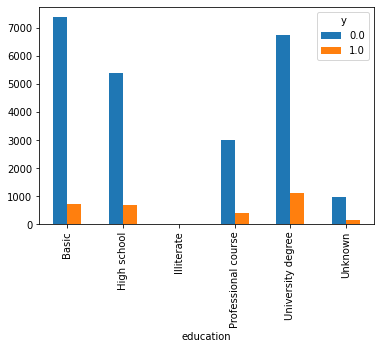

In [15]:
pd.crosstab(banking['education'],banking['y']).plot(kind='bar')

In [16]:
pd.crosstab(banking['job'],banking['y'])

y,0.0,1.0
job,,
admin.,5790,897
blue-collar,5564,414
entrepreneur,872,94
housemaid,616,63
management,1702,217
retired,820,282
self-employed,838,93
services,2291,218
student,380,186


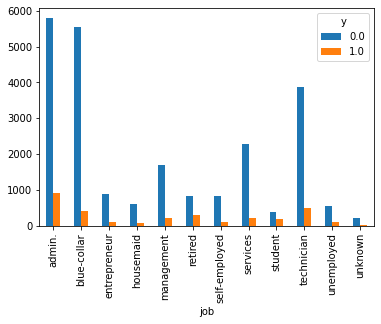

In [17]:
pd.crosstab(banking['job'],banking['y']).plot(kind='bar')

In [18]:
pd.crosstab(banking['marital'],banking['y'])

y,0.0,1.0
marital,,
divorced,2661,306
married,14406,1664
single,6369,1078
unknown,43,7


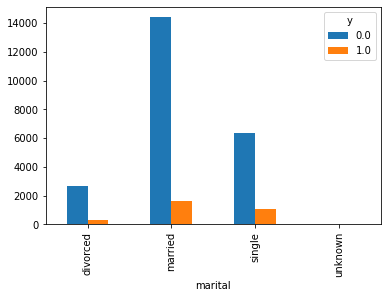

In [19]:
pd.crosstab(banking['marital'],banking['y']).plot(kind='bar')

In [20]:
pd.crosstab(banking['housing'],banking['y'])

y,0.0,1.0
housing,,
no,10641,1362
unknown,557,69
yes,12281,1624


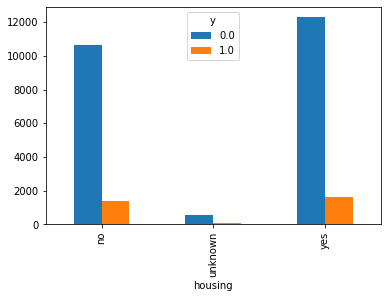

In [21]:
pd.crosstab(banking['housing'],banking['y']).plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


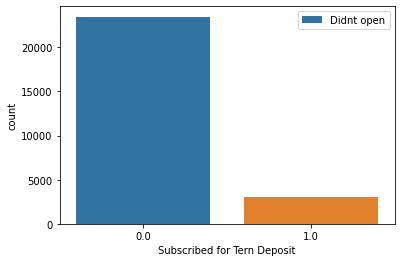

In [22]:
sns.countplot(banking['y'])
plt.xlabel('Subscribed for Tern Deposit')
plt.legend(labels=['Didnt open','Opened'])

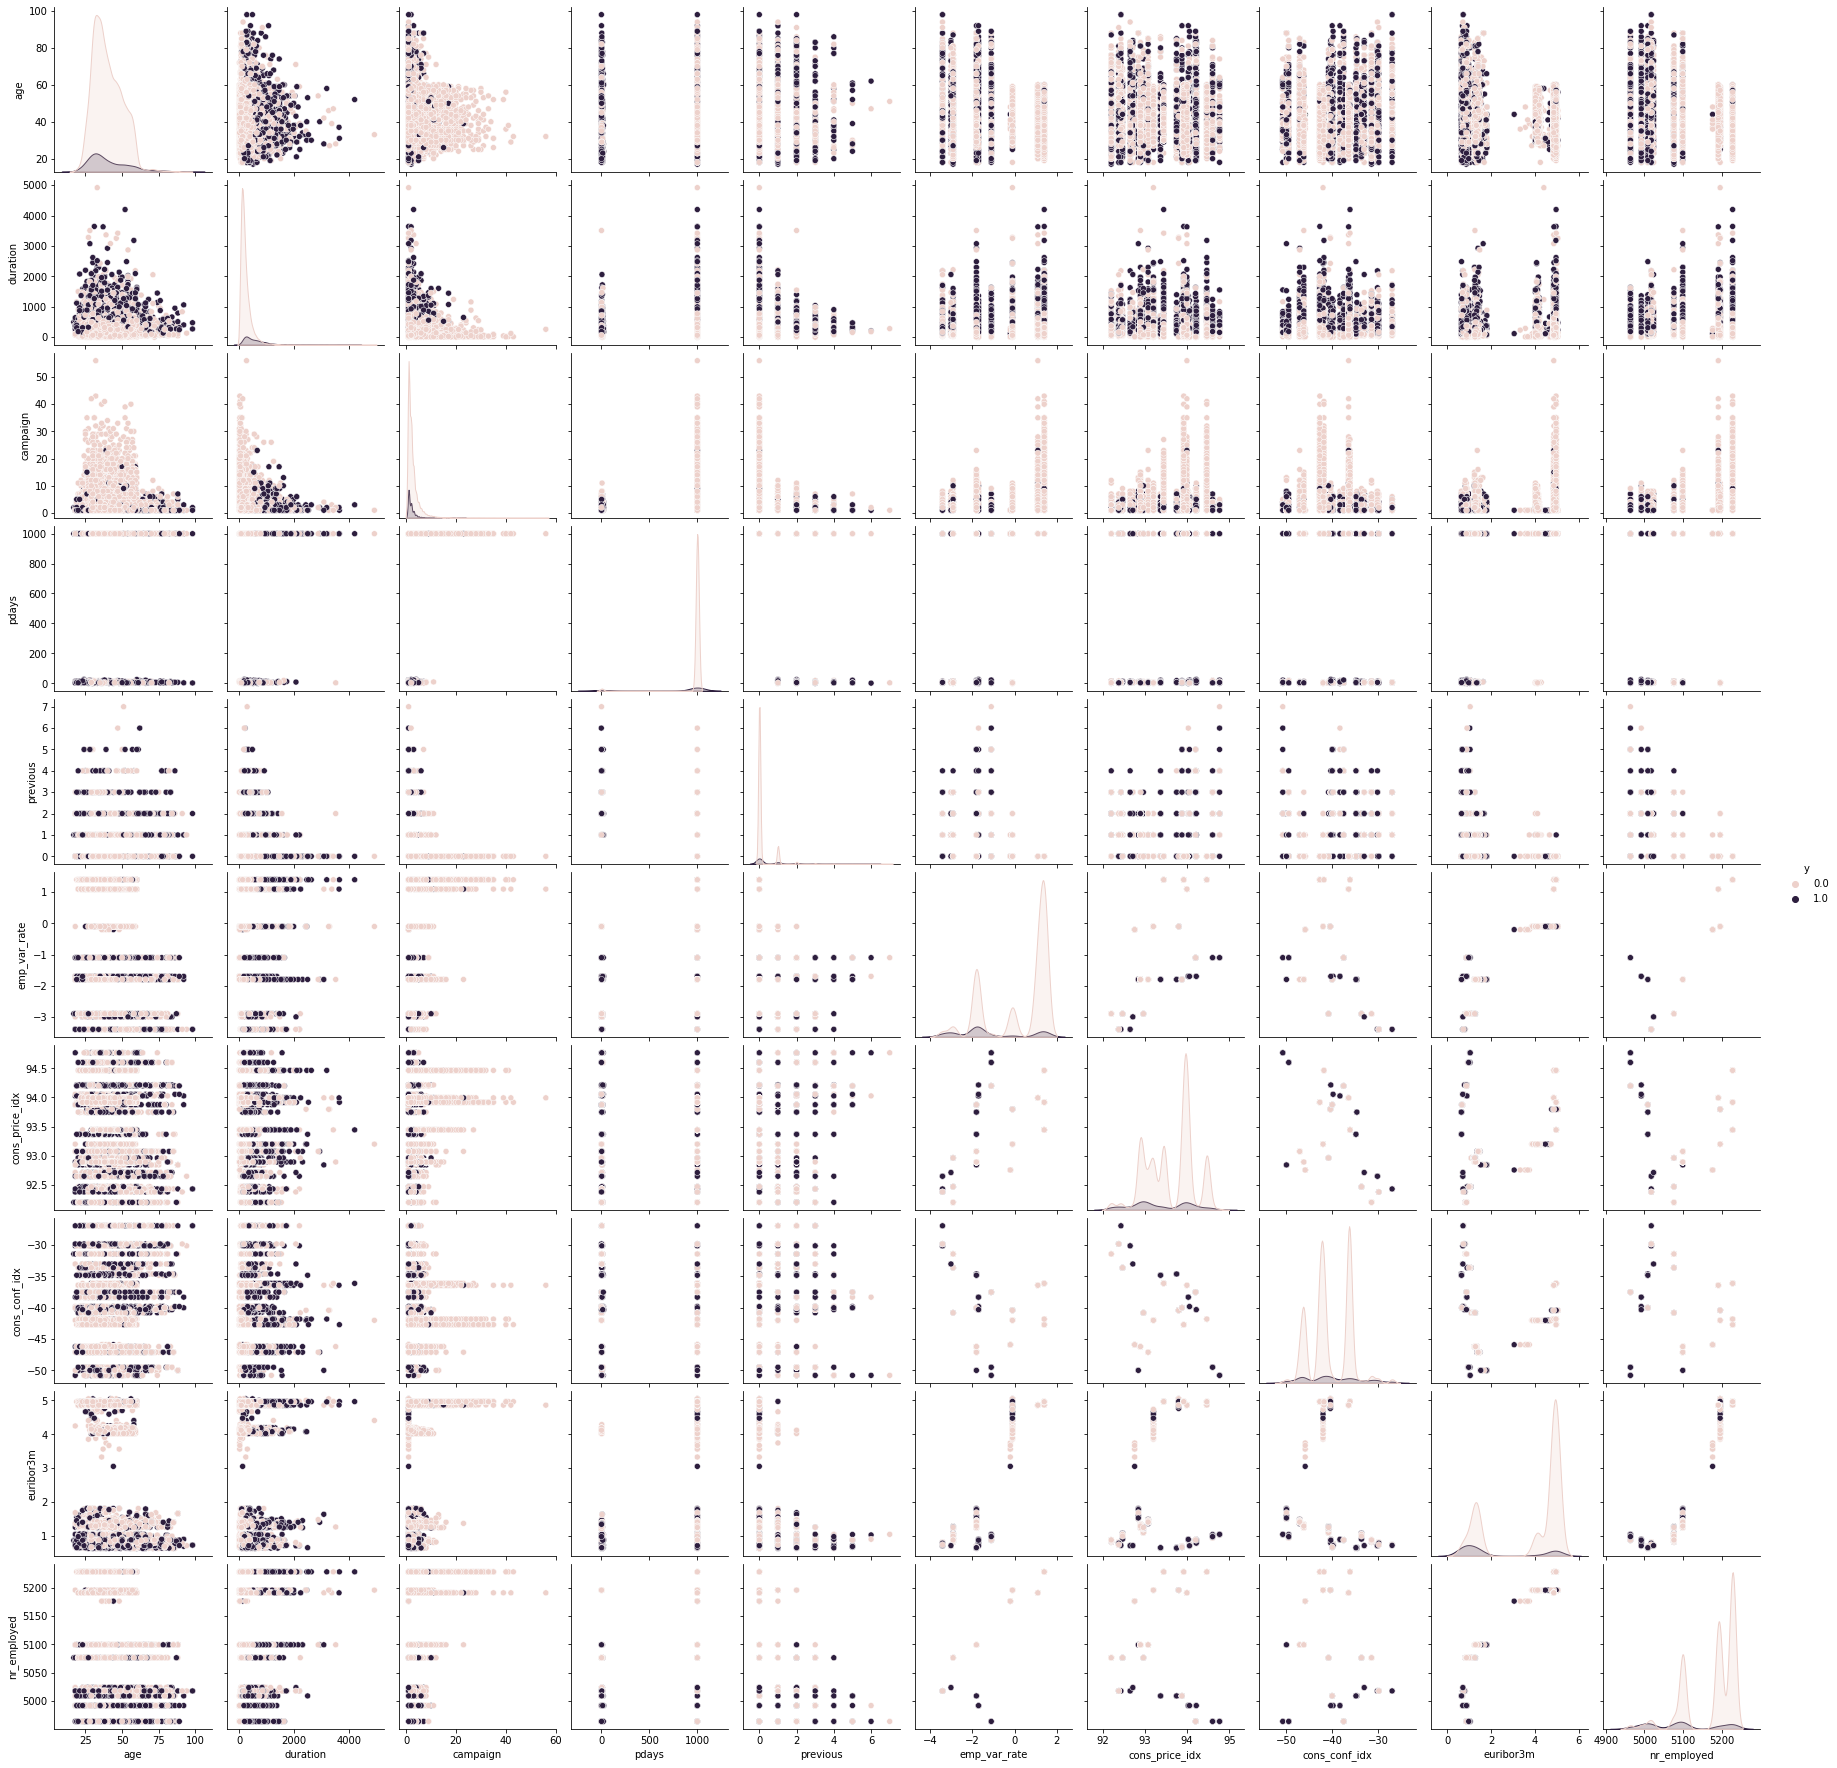

In [ ]:
sns.pairplot(data=banking,hue='y')

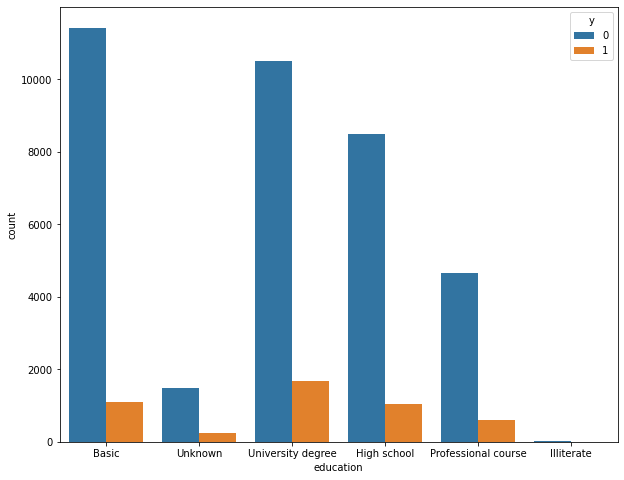

In [47]:
plt.figure(figsize=(10,8))
sns.countplot(x='education',hue='y',data=banking)

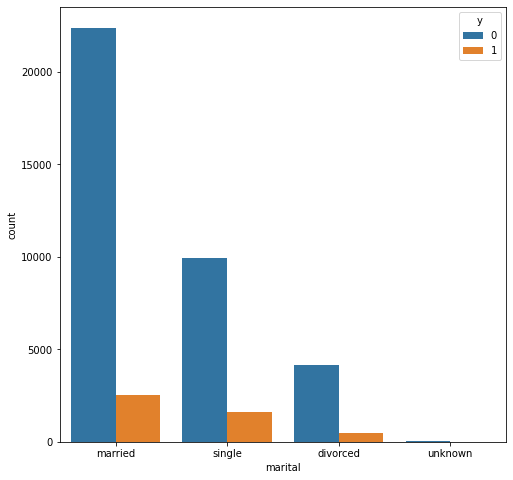

In [48]:
plt.figure(figsize=(8,8))
sns.countplot(x='marital',hue='y',data=banking)

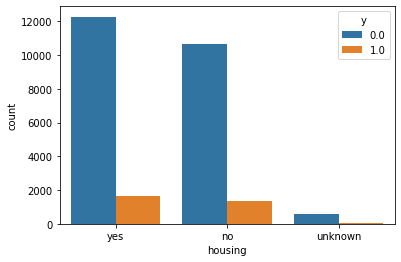

In [25]:
sns.countplot(x='housing',hue='y',data=banking)


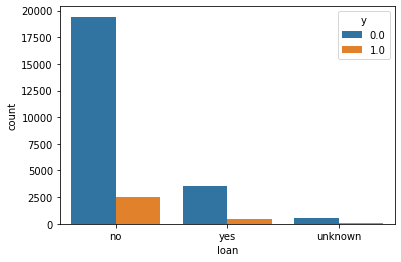

In [26]:
sns.countplot(x='loan',hue='y',data=banking)


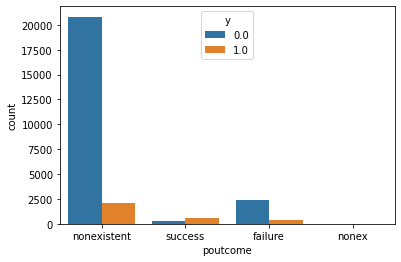

In [27]:
sns.countplot(x='poutcome',hue='y',data=banking)


select numeric and categorical datatypes


In [49]:
numeric_dtypes = banking.select_dtypes(exclude=object)


Text(0.5, 1.0, 'Correlation Matrix')

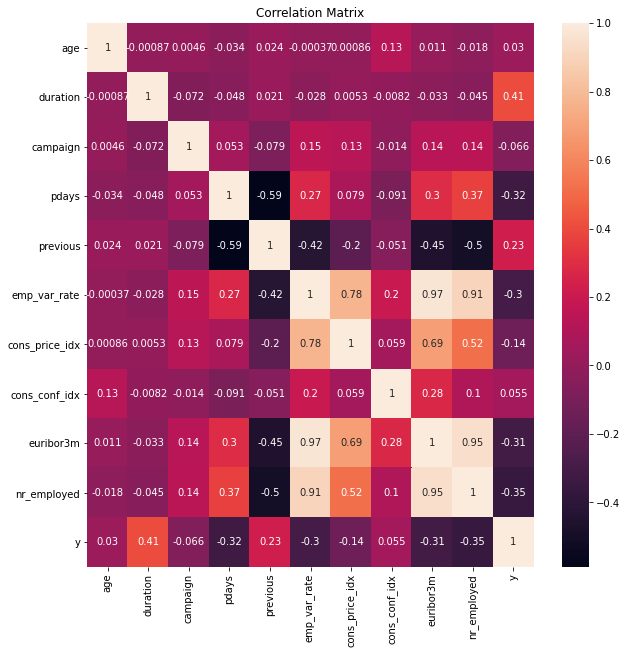

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(numeric_dtypes.corr(),annot=True)
plt.title('Correlation Matrix')

Creating Dummy Variable


In [51]:
cat_col=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [52]:
for col in cat_col:
  banking=pd.concat([banking.drop(col,axis=1),pd.get_dummies(banking[col],prefix=col,prefix_sep='-',drop_first=True)],axis=1)

In [32]:
banking.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job-blue-collar,job-entrepreneur,job-housemaid,job-management,job-retired,job-self-employed,job-services,job-student,job-technician,job-unemployed,job-unknown,marital-married,marital-single,marital-unknown,education-High school,education-Illiterate,education-Professional course,education-University degree,education-Unknown,default-unknown,default-yes,housing-unknown,housing-yes,loan-unknown,loan-yes,contact-telephone,month-aug,month-dec,month-jul,month-jun,month-mar,month-may,month-nov,month-oct,month-sep,day_of_week-mon,day_of_week-thu,day_of_week-tue,day_of_week-wed,poutcome-nonex,poutcome-nonexistent,poutcome-success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Splitting the data


In [53]:
X = banking.drop('y',axis=1)

In [54]:
y=banking['y']

Modelling


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [56]:
lr=LogisticRegression()

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [58]:
X_train.shape

(28831, 51)

In [59]:
y_train.shape

(28831,)

In [60]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred=lr.predict(X_test)

In [62]:
print("Accuracy score is : ",accuracy_score(y_test,y_pred))

Accuracy score is :  0.9116290361738286


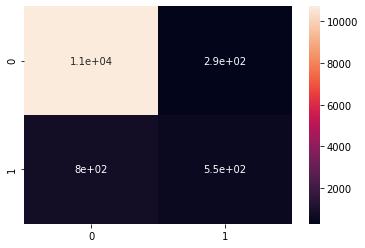

In [63]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [64]:
print("Confusion Matrix is : ",confusion_matrix(y_test,y_pred))

Confusion Matrix is :  [[10713   293]
 [  799   552]]


In [65]:
print("Classification Report is :",classification_report(y_test,y_pred))

Classification Report is :               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11006
           1       0.65      0.41      0.50      1351

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [66]:
probs=lr.predict_proba(X_test)

In [67]:
probs

array([[0.97894678, 0.02105322],
       [0.72935299, 0.27064701],
       [0.988294  , 0.011706  ],
       ...,
       [0.98871785, 0.01128215],
       [0.99262754, 0.00737246],
       [0.92118379, 0.07881621]])

In [68]:
prob=probs[:,1]

In [69]:
prob

array([0.02105322, 0.27064701, 0.011706  , ..., 0.01128215, 0.00737246,
       0.07881621])

In [71]:
print("AUC is ",roc_auc_score(y_test,prob))

AUC is  0.9215296467723076


Text(0, 0.5, 'TPR')

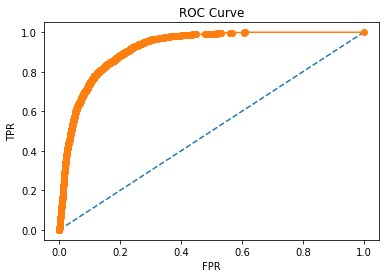

In [84]:
fpr,tpr,_ = roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='o')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")